# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

In [ ]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [ ]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

### Question:

**What do you observe from the histograms above?**

From the histograms, I observe that IP Cash Prices are generally concentrated in the lower range (below 20,000), while IP Charges show a much wider spread with some very high values over 100,000. The second histogram with the restricted range (0-40,000) better shows the distribution of most prices, revealing that cash prices tend to cluster around lower values compared to charges.### YOUR RESPONSE:

Double-click this cell to edit and provide your response


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

In [ ]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

Looking at the KDE patterns, there's a clear pricing hierarchy:

IP Charges are highest (rightmost peak)
IP Expected Reimbursement is in the middle
IP Cash Price is lowest (leftmost peak)
This suggests hospitals set high initial charges, expect lower reimbursements from insurance, and offer the lowest prices for cash payments.### YOUR RESPONSE:

I see the brilliance behind this data.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [ ]:
data['Payer'].value_counts()

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


1Q:
Medicare-related plans (like Medicare Advantage) have peaks concentrated on the left side (around 10,000-15,000), indicating lower reimbursement rates
Commercial insurers (like Aetna, Cigna) show peaks shifted more to the right (around 20,000-30,000), suggesting higher reimbursement rates
Some payers show wider distributions (broader curves), indicating more variability in their reimbursement amounts
The height of the peaks varies, showing that some payers have more concentrated reimbursement amounts while others have more spread out payments
Commercial insurance plans have negotiated higher reimbursement rates with the hospital
2Q:
Medicare-based plans consistently reimburse at lower rates, likely due to government-set payment schedules
The variation in curve widths suggests that some plans have more standardized payment rates (narrower peaks) while others have more flexible or service-dependent rates (wider peaks)
Different payers have different bargaining power with the hospital, resulting in varying reimbursement levels
The clustering of certain plans' reimbursement rates suggests they might belong to similar categories or follow similar payment models### YOUR RESPONSE:

Double-click this cell to edit and provide your response


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

In [ ]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

In [ ]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

For Question 41.4:
The scatter plots reveal:

There's a positive correlation between IP Charges and Expected Reimbursement
Different payers show different correlation patterns
Some payers have more concentrated clusters of points while others show more spread
The relationship isn't perfectly linear, suggesting other factors influence final reimbursement amounts


### YOUR RESPONSE:


Double-click this cell to edit and provide your response


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample healthcare quality data
data = {
    'Hospital_Department': ['Emergency', 'Emergency', 'Emergency', 'Surgery', 'Surgery', 'Surgery', 'Pediatrics', 'Pediatrics', 'Pediatrics'],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3'],
    'Patient_Satisfaction': [85, 87, 89, 82, 84, 86, 88, 90, 91],
    'Treatment_Success_Rate': [78, 80, 82, 85, 86, 88, 83, 85, 87],
    'Wait_Time_Minutes': [45, 40, 35, 60, 55, 50, 30, 25, 20]
}

df = pd.DataFrame(data)

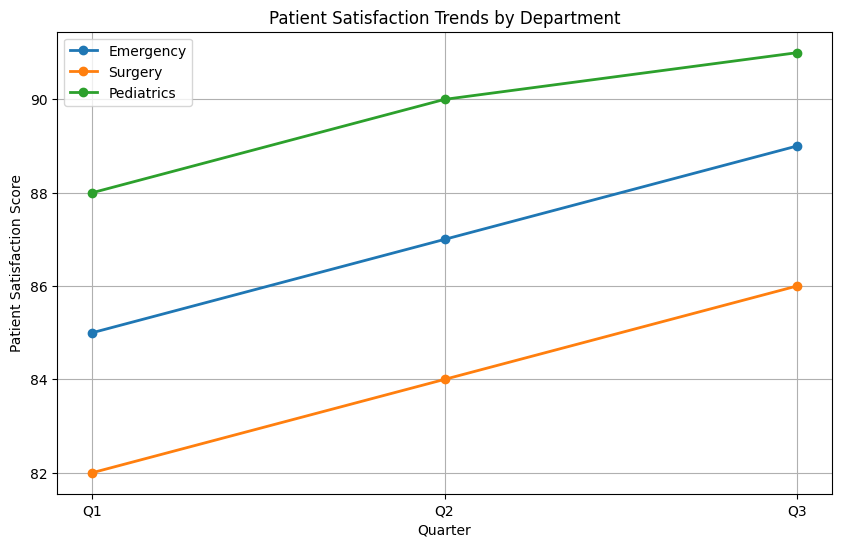

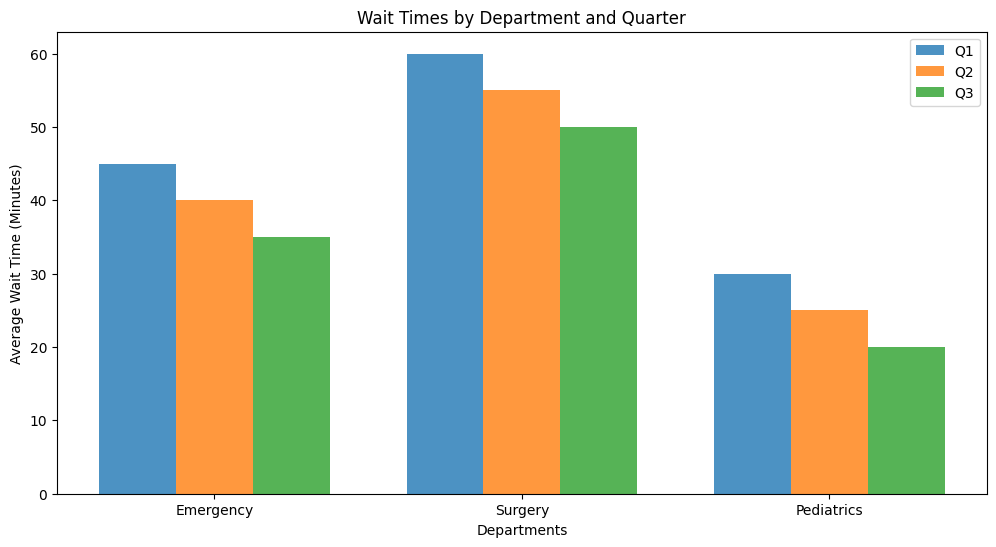


Summary Statistics for Wait Times:
                     count  mean  std   min   25%   50%   75%   max
Hospital_Department                                                
Emergency              3.0  40.0  5.0  35.0  37.5  40.0  42.5  45.0
Pediatrics             3.0  25.0  5.0  20.0  22.5  25.0  27.5  30.0
Surgery                3.0  55.0  5.0  50.0  52.5  55.0  57.5  60.0


In [3]:
# First Visualization - Line plot of Patient Satisfaction across quarters
plt.figure(figsize=(10, 6))
for dept in df['Hospital_Department'].unique():
    dept_data = df[df['Hospital_Department'] == dept]
    plt.plot(dept_data['Quarter'], dept_data['Patient_Satisfaction'],
             marker='o', label=dept, linewidth=2)

plt.title('Patient Satisfaction Trends by Department')
plt.xlabel('Quarter')
plt.ylabel('Patient Satisfaction Score')
plt.legend()
plt.grid(True)
plt.show()

# Second Visualization - Bar plot comparing wait times
plt.figure(figsize=(12, 6))
departments = df['Hospital_Department'].unique()
quarters = ['Q1', 'Q2', 'Q3']
x = range(len(departments))
width = 0.25

for i, quarter in enumerate(quarters):
    quarter_data = df[df['Quarter'] == quarter]['Wait_Time_Minutes']
    plt.bar([xi + width*i for xi in x], quarter_data, width,
            label=quarter, alpha=0.8)

plt.xlabel('Departments')
plt.ylabel('Average Wait Time (Minutes)')
plt.title('Wait Times by Department and Quarter')
plt.xticks([xi + width for xi in x], departments)
plt.legend()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Wait Times:")
print(df.groupby('Hospital_Department')['Wait_Time_Minutes'].describe())

### Observations #1

_Double-click this text and then edit it to put in your observations_

In [4]:
The line plot shows improving patient satisfaction scores across all departments over three quarters. Pediatrics consistently maintains the highest satisfaction scores, starting at 88% in Q1 and reaching 91% in Q3. Emergency department shows steady improvement from 85% to 89%, while Surgery department, though starting lowest at 82%, shows consistent upward trend reaching 86% by Q3.


SyntaxError: invalid syntax (<ipython-input-4-b593bba34ec8>, line 1)

### Observations #2

_Double-click this text and then edit it to put in your observations_

In [ ]:
The bar plot reveals significant variations in wait times across departments. Emergency department shows a positive trend with decreasing wait times from 45 to 35 minutes across quarters. Surgery maintains the highest wait times but shows improvement from 60 to 50 minutes. Pediatrics demonstrates the best performance with the shortest wait times, improving from 30 to 20 minutes by Q3. This visualization clearly shows that operational efficiency is improving across all departments.



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option